<a href="https://colab.research.google.com/github/khagfy/literate-course/blob/master/Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Zulaikha

# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load Dataset

In [2]:
df = pd.read_csv("loan_customer.csv")

In [3]:
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

Pengamatan\:
1. Data terdiri dari 621 baris
2. Tampak beberapa kolom masih memiliki null/missing values (Non-Null Count < jumlah baris)
3. Tipe kolom birth_date memiliki tipe yang salah, sedangkan kolom lainnya sepertinya tidak ada issue yang mencolok pada tipe data (sudah sesuai)

# Data Cleansing

## Handling missing values

### Cek apakah terdapat data yang kosong

In [5]:
df.isnull().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

In [6]:
df['birth_date']= pd.to_datetime(df['birth_date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   loan_id             621 non-null    object        
 1   birth_date          572 non-null    datetime64[ns]
 2   phone_number        569 non-null    float64       
 3   gender              608 non-null    object        
 4   married             618 non-null    object        
 5   dependents          605 non-null    object        
 6   education           620 non-null    object        
 7   self_employed       588 non-null    object        
 8   applicant_income    612 non-null    float64       
 9   coapplicant_income  621 non-null    float64       
 10  loan_amount         621 non-null    int64         
 11  loan_term_month     621 non-null    int64         
 12  loan_term_year      621 non-null    int64         
 13  credit_history      570 non-null    float64       

### Jika ada kolom dengan data kosong yang sangat banyak, maka kolom tersebut bisa dihapus aja

In [8]:
df.drop('has_credit_card', axis=1, inplace=True)

In [9]:
df

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,LP002978,1976-03-25,6.285650e+11,Female,No,0,Graduate,No,2900.0,0.0,71000,360,30,1.0,studio,APPROVE
617,LP002979,1987-01-26,6.281165e+11,Male,Yes,3+,Graduate,No,4106.0,0.0,40000,180,15,1.0,studio,APPROVE
618,LP002983,1982-03-08,6.281158e+11,Male,Yes,1,Graduate,No,8072.0,240.0,253000,360,30,1.0,house,APPROVE
619,LP002984,1986-12-05,6.281196e+11,Male,Yes,2,Graduate,No,7583.0,0.0,187000,360,30,1.0,house,APPROVE


Untuk data kosong lainnya, kita bisa menggunakan teknik 1 untuk mengatasi data kosong yakni dengan menghapusnya \
Sebelum dihapus mari kita lihat berapa dimensi dari datasetnya

In [10]:
df.shape

(621, 16)

Masih seperti awal, terdapat 621 baris dan kemudian kita hapus data yang kosong kemudian cek kembali dimensinya

In [12]:
df.dropna(inplace=True)
df.shape

(434, 16)

Setelah dilakukan penghapusan data yang kosong, kini data menjadi 434 baris\
Supaya lebih meyakinkan mari kita check lagi datanya, apakah masih ada yang kosong?

In [11]:
df.isnull().sum()

loan_id                0
birth_date            49
phone_number          52
gender                13
married                3
dependents            16
education              1
self_employed         33
applicant_income       9
coapplicant_income     0
loan_amount            0
loan_term_month        0
loan_term_year         0
credit_history        51
property_type          1
loan_status            0
dtype: int64

Data sudah tidak ada yg null lagi 

## Handling duplicated data

In [13]:
df.duplicated().sum()

5

Selanjutnya, kita hapus data yang duplikat

In [14]:
print('Jumlah data duplikat')
print(df.duplicated().sum())
print('Jumlah data duplikat setelah dihapus')
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

Jumlah data duplikat
5
Jumlah data duplikat setelah dihapus
0


Data nya sudah tidak ada yang duplikat lagi 

## Outlier handlings

### applicant_income

Untuk mengecek apakah ada outlier yang sangat mempengaruhi data maka kita bisa melihatnya dengan menggunakan boxplot seperti di bawah ini. Data tersebut terlihat tidak normal dikarenakan adanya outlier.

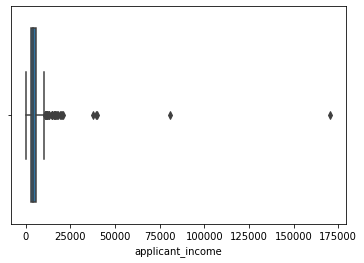

In [15]:
sns.boxplot(x='applicant_income', data=df)

In [16]:
print('Jumlah baris sebelum memfilter outlier:', len(df))

Q1 = df['applicant_income'].quantile(0.25)
Q3 = df['applicant_income'].quantile(0.75)

IQR = Q3-Q1

low_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR

df = df[(df["applicant_income"] >= low_limit) &
        (df["applicant_income"] <= high_limit)
        ]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 429
Jumlah baris setelah memfilter outlier: 397


Setelah data difilter dari outlier, maka persebaran data menjadi lebih merata seperti di bawah ini

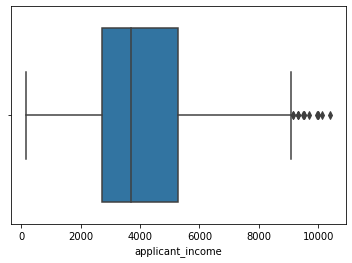

In [17]:
sns.boxplot(x='applicant_income', data=df)

Lakukan cara yang sama untuk kolom-kolom lainnya yang bertipe numerik

### coapplicant_income

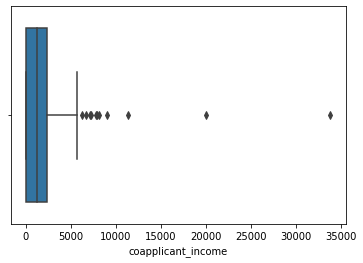

In [18]:
sns.boxplot(x='coapplicant_income', data=df)

In [19]:
print('Jumlah baris sebelum memfilter outlier:', len(df))

Q1 = df['coapplicant_income'].quantile(0.25)
Q3 = df['coapplicant_income'].quantile(0.75)

IQR = Q3-Q1

low_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR

df = df[(df["coapplicant_income"] >= low_limit) &
        (df["coapplicant_income"] <= high_limit)
        ]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 397
Jumlah baris setelah memfilter outlier: 386


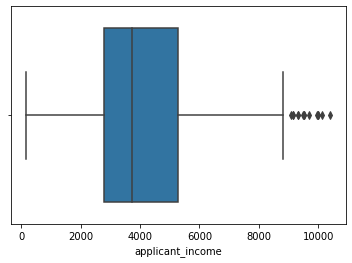

In [20]:
sns.boxplot(x='applicant_income', data=df)

### loan_amount

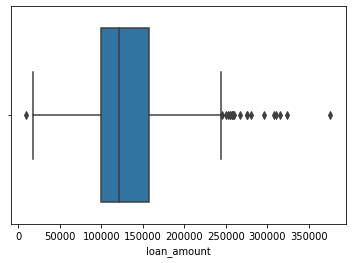

In [21]:
sns.boxplot(x='loan_amount', data=df)

In [22]:
print('Jumlah baris sebelum memfilter outlier:', len(df))

Q1 = df['loan_amount'].quantile(0.25)
Q3 = df['loan_amount'].quantile(0.75)

IQR = Q3-Q1

low_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR

df = df[(df["loan_amount"] >= low_limit) &
        (df["loan_amount"] <= high_limit)
        ]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 386
Jumlah baris setelah memfilter outlier: 366


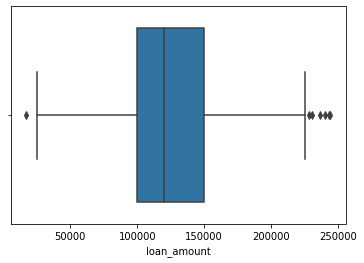

In [23]:
sns.boxplot(x='loan_amount', data=df)

In [24]:
# mengecek ukuran data setelah melalui proses filter outlier
df.shape

(366, 16)

## Feature Encoding

In [25]:
df1 = df.copy()

# membuat daftar nama kolom yang bertipe kategorikal
cats = ['gender', 'married', 'dependents', 'education', 'self_employed', 'property_type']

# melihat kategori dari setiap kolom
for i in cats:
    print('Kolom', i, df1[i].unique())

Kolom gender ['Male' 'Female']
Kolom married ['No' 'Yes']
Kolom dependents ['0' '1' '3+' '2']
Kolom education ['Graduate' 'Not Graduate']
Kolom self_employed ['No' 'Yes']
Kolom property_type ['house' 'studio' 'apartment']


Membuat label encoding untuk setiap kategori

In [26]:
mapping_gender = {
    'Male' : 0,
    'Female' : 1
}

mapping_married = {
    'No' : 0,
    'Yes' : 1
}

mapping_dependents = {
    '0' : 0,
    '1' : 1,
    '2' : 2,
    '3+' : 3
}

mapping_education = {
    'Not Graduate' : 0,
    'Graduate' : 1
}

mapping_self_employed = {
    'No' : 0,
    'Yes' : 1
}

mapping_property_type = {
    'house' : 0,
    'studio' : 1, 
    'apartment' : 2
}

df1['gender'] = df1['gender'].map(mapping_gender)
df1['married'] = df1['married'].map(mapping_married)
df1['dependents'] = df1['dependents'].map(mapping_dependents)
df1['education'] = df1['education'].map(mapping_education)
df1['self_employed'] = df1['self_employed'].map(mapping_self_employed)
df1['property_type'] = df1['property_type'].map(mapping_property_type)

In [27]:
df

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,LP002964,1984-02-27,6.281191e+11,Male,Yes,2,Not Graduate,No,3987.0,1411.0,157000,360,30,1.0,studio,APPROVE
615,LP002974,1988-03-24,6.285739e+11,Male,Yes,0,Graduate,No,3232.0,1950.0,108000,360,30,1.0,studio,APPROVE
616,LP002978,1976-03-25,6.285650e+11,Female,No,0,Graduate,No,2900.0,0.0,71000,360,30,1.0,studio,APPROVE
617,LP002979,1987-01-26,6.281165e+11,Male,Yes,3+,Graduate,No,4106.0,0.0,40000,180,15,1.0,studio,APPROVE


# Business Insight

Diclaimer: tidak ada jawaban benar salah dalam tahap ini. Setiap individu memiliki interpretasi yang berbeda-beda dalam menerjemahkan data menjadi sebuah insight. Feedback ini hanya untuk sharing dan berbagi pandangan dengan harapan bisa membantu pemahaman menjadi lebih baik :)

## Analisis minat pelanggan berdasarkan pada tipe properti

In [28]:
df_gr1 = df.groupby(['gender', 'property_type'])['loan_id'].count().reset_index()
df_gr1.columns = ['gender', 'property_type', 'count']
df_gr1

,gender,property_type,count
0,Female,apartment,34
1,Female,house,16
2,Female,studio,17
3,Male,apartment,114
4,Male,house,98
5,Male,studio,87


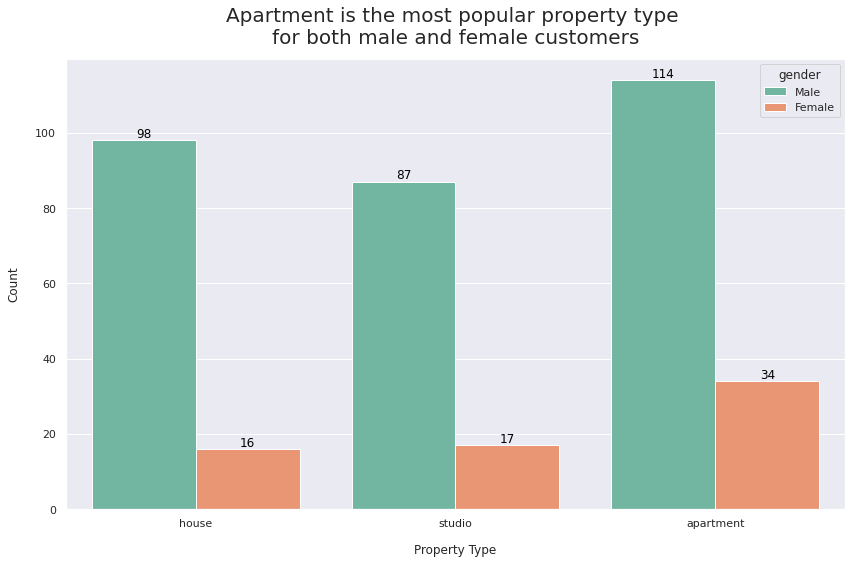

In [29]:
# Dapatkan penjelasan lengkap mengenai data visualization di dalam bootcamp ^^
sns.set(style="darkgrid")
f, ax = plt.subplots(1,1,figsize=(12,8))
sns.countplot(x = 'property_type', data = df, hue = 'gender', palette = "Set2")

for bar in ax.patches:
    bar_value = bar.get_height()
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color='black', size=12)
    
ax.set_xlabel('Property Type', labelpad=15)
ax.set_ylabel('Count', labelpad=15)
ax.set_title('Apartment is the most popular property type \nfor both male and female customers', pad=15, size=20)
plt.tight_layout() 
plt.savefig('Analyze_the_behavior_of_loan_property_customers_01.png', dpi=200);

## Analisis pengaruh status perkawinan terhadap jangka waktu meminjam 

In [30]:
df_gr2 = df.groupby(['married', 'loan_term_year'])['loan_id'].count().reset_index()
df_gr2.columns = ['married', 'loan_term_year', 'number_of_applicant']
df_gr2

,married,loan_term_year,number_of_applicant
0,No,3,2
1,No,5,1
2,No,10,1
3,No,15,4
4,No,25,3
5,No,30,119
6,No,40,6
7,Yes,5,1
8,Yes,7,3
9,Yes,10,1


Data di atas menunjukkan perbedaan kategori dalam data waktu lama meminjam. Oleh karena itu perlu dilakukan grouping untuk membuat kategori lama waktu meminjam menjadi seragam antara pelanggan menikah dan belum menikah, sehingga kita bisa melihat terlebih dahulu persebaran datanya

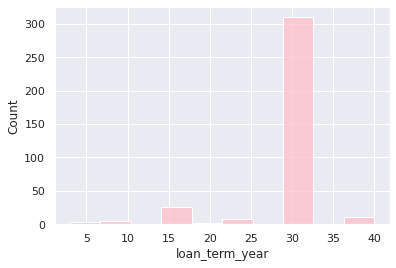

In [31]:
sns.histplot(data=df, x="loan_term_year", bins=10, color="pink")

Berdasarkan grafik di atas, maka kita dapat mengelompokkan data menjadi beberapa kategori yaitu:
- `<15`
- `15-25`
- `30`
- `>30`

In [32]:
# membuat kategori untuk loan_term_year
loan_term_year_group = {}
for i in range(1,41):
    if i<15:
        loan_term_year_group[i]= '<15'
    elif i>=15 and i<=25:
        loan_term_year_group[i]= '15-25'
    elif i==30:
        loan_term_year_group[i]= '30'
    elif i>30:
        loan_term_year_group[i]= '>30'
    else:
        pass
    
# membuat kolom baru berdasarkan pada grouping sebelumnya
df_gr2['loan_term_year_group'] = df_gr2['loan_term_year'].replace(loan_term_year_group)

Text(-0.5, 205, 'Most applicants who are married or not have chosen a loan term of 30 years')

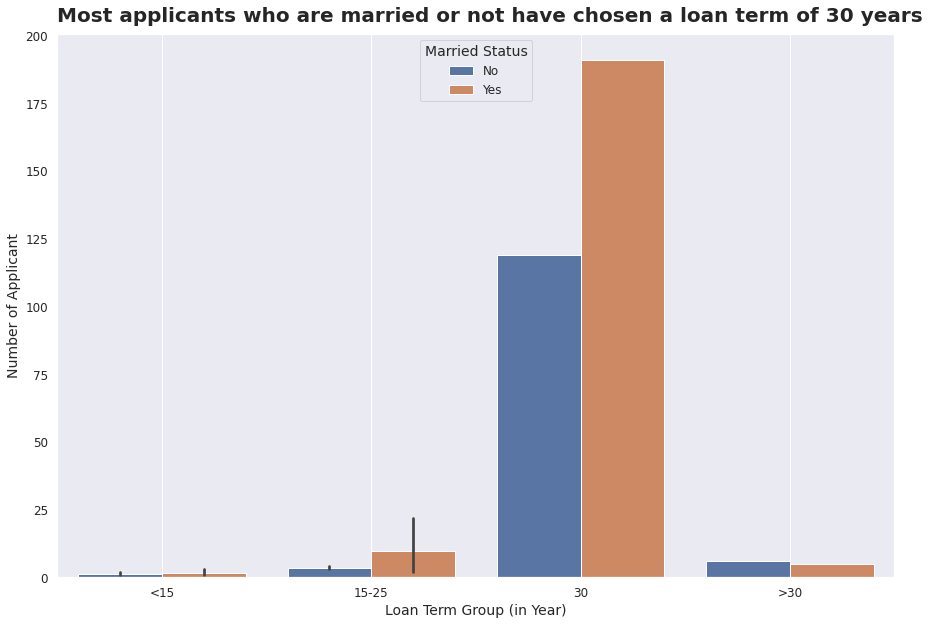

In [33]:
# Dapatkan penjelasan lengkap mengenai data visualization di dalam bootcamp ^^
plt.figure(figsize=(15,10))
sns.barplot(x='loan_term_year_group', y='number_of_applicant', hue='married', data=df_gr2)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid()
plt.legend(title='Married Status', title_fontsize=14, prop={'size':12}, loc=9)

plt.xlabel('Loan Term Group (in Year)', fontsize=14)
plt.ylabel('Number of Applicant', fontsize=14)
plt.text(x=-0.5, y=205, s="Most applicants who are married or not have chosen a loan term of 30 years", 
         fontsize=20, fontweight='bold') 

### Kesimpulan

Berdasarkan pada pengamatan yang dilakukan, dapat disimpulkan bahwa perilaku pelanggan baik perempuan atau laki-laki kebanyakan mengajukan pinjaman untuk tipe properti apartemen. Kemudian jika dilihat dari status perkawinan, pelanggan yang sudah menikah ataupun belum menikah merasa jangka waktu ideal dalam meminjam adalah selama 30 tahun. Selain itu ada pula hal yang menarik untuk pelanggan yang sudah menikah, terlihat beberapa pelanggan tertarik meminjam dengan jangka waktu 15-25 tahun. Kemungkinan hal ini terjadi karena bagi beberapa pelanggan yang sudah menikah kemungkinan suami dan istri memiliki penghasilan, sehingga jangka waktu 15-25 tahun dirasa ideal pula. 


--Collaborate with Rakamin Academy Course--